In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
mpl.rcParams["figure.dpi"] = 96
# esto depende de las fuentes que tengas instaladas en el sistema.
mpl.rcParams["font.family"] = "Fira Sans Extra Condensed"
pd.set_option('display.max_columns', None)

In [9]:
df_2020 = pd.read_csv('../data/external/conaset/Siniestros_de_transito_en_rutas_de_Chile_2020..csv')
df_2015_2019 = pd.read_csv('../data/external/conaset/Siniestros_de_transito_en_rutas_de_Chile_2015_-_2019..csv')
df = pd.concat([df_2020, df_2015_2019])
df

,X,Y,FID,Año,Idaccident,Claseaccid,Fecha,Cód_Comun,Comuna,Cód_Regi,Región,Cód_Tipo_,Tipo_Accid,Cód_Tipo1,Tipo__CONA,Cód_Zona,Zona,Cód_Ubica,Ubicación,Cód_Causa,Causa,Cód_Cau_1,Causa__CON,Ruta,Cód_Ruta,m_ubicacio,Pistas_de_,Pistas_de1,Calzada,Cód__Tipo,Tipo_Calza,Cód_Estad,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Hora,km,Ubicaci_1,Ubicacion_,Cód_Calza
0,-70.775943,-33.445893,1,2020,1316761,1,2020/12/07 00:00:00+00,13604,PADRE HURTADO,13,REGION METROPOLITANA,30,COLISION,30,COLISION,1,URBANA,1,TRAMO DE VIA RECTA,91,VIRAJES INDEBIDOS,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 68,73A068,6000.0,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,21:30:00,6.00,NaN,NaN,NaN
1,-70.768971,-33.370581,2,2020,1308488,1,2020/10/23 00:00:00+00,13302,LAMPA,13,REGION METROPOLITANA,70,VOLCADURA,70,VOLCADURA,2,RURAL,1,TRAMO DE VIA RECTA,95,PERDIDA CONTROL VEHICULO,9,PERDIDA CONTROL VEHICULO,G-16,73B016,2000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,1,0,0,11:00:00,2.00,NaN,NaN,NaN
2,NaN,NaN,3,2020,1285214,1,2020/06/12 00:00:00+00,13302,LAMPA,13,REGION METROPOLITANA,65,CHOQUE LADO/LADO,40,CHOQUE,2,RURAL,1,TRAMO DE VIA RECTA,29,CONDUCCION CAMBIAR SORPRESIVAMENTE PISTA CIRCU...,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 NORTE,73A0N5,17750.0,3,3,BIDIRECCIONAL CON BANDEJON,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,1,0,0,1,15:19:00,17.75,NaN,NaN,NaN
3,NaN,NaN,4,2020,1264120,1,2020/02/03 00:00:00+00,13404,PAINE,13,REGION METROPOLITANA,33,COLISION POR ALCANCE,30,COLISION,2,RURAL,25,PLAZA DE PEAJE,93,CONDUCIR VEHICULO EN RETROCESO,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 SUR,73A0S5,54000.0,3,3,BIDIRECCIONAL CON BANDEJON,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,2,15:00:00,54.00,NaN,NaN,NaN
4,-71.209344,-33.404135,5,2020,1267531,1,2020/03/01 00:00:00+00,13503,CURACAVI,13,REGION METROPOLITANA,33,COLISION POR ALCANCE,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,28,CONDUCCION SIN MANTENER DISTANCIA RAZONABLE NI...,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 68,73A068,50000.0,2,2,BIDIRECCIONAL CON BANDEJON,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,1,17:40:00,50.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61909,-70.307919,-18.350484,61910,2017,976499,1,2017/02/04 00:00:00+00,15101,ARICA,15,REGION ARICA Y PARINACOTA,30,COLISION,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,1,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,27,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 NORTE,61A005,NaN,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,0.802083,NaN,2087,2087000.0,2.0
61910,-70.146853,-18.537056,61911,2018,1096931,1,2018/04/08 00:00:00+00,15101,ARICA,15,REGION ARICA Y PARINACOTA,52,CHOQUE LATERAL,40,CHOQUE,2,RURAL,1,TRAMO DE VIA RECTA,4,CONDUCCION EN ESTADO DE EBRIEDAD,24,ALCOHOL EN CONDUCTOR,A-27,61C027,NaN,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,0.916667,NaN,16,16000.0,2.0
61911,-69.591023,-18.339212,61912,2017,1009343,1,2017/06/17 00:00:00+00,15201,PUTRE,15,REGION ARICA Y PARINACOTA,70,VOLCADURA,70,VOLCADURA,2,RURAL,3,TRAMO DE VIA CURVA VERTICAL,7,VELOCIDAD NO RAZONABLE NI PRUDENTE,72,VELOCIDAD IMPRUDENTE,11 CH,61A011,NaN,1,1,BIDIRECCIONAL,2,ASFALTO,2,REGULAR,1,SECO,1,DESPEJADO,0,0,0,1,0.333333,NaN,99,99000.0,2.0
61912,-69.427569,-17.710322,61913,2019,1216416,1,2019/08/01 00:00:00+00,15201,PUTRE,15,REGION ARICA Y PARINACOTA,70,VOLCADURA,70,VOLCADURA,2,RURAL,2,TRAMO DE VIA CURVA HORIZONTAL,9,PERDIDA CONTROL VEHICULO,95,PERDIDA CONTROL VEHICULO,A-123,61C123,NaN,1,1,BIDIRECCIONAL,5,RIPIO,2,REGULAR,0,,1,DESPEJADO,0,0,0,3,0.774306,NaN,16,16000.0,2.0


In [13]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.X, df.Y))

<AxesSubplot:>

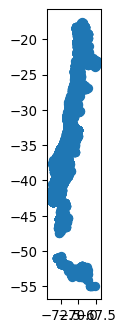

In [14]:
gdf.plot()

In [16]:
gdf.Región.unique()

array(['REGION METROPOLITANA', 'REGION LOS LAGOS',
       'REGION AYSEN DEL GRL. CARLOS IBAÑEZ DEL CAMPO',
       'REGION DE LOS RIOS', 'REGION MAGALLANES Y ANTARTICA CHILENA',
       'REGION ARAUCANIA', 'REGION BIO BIO', 'REGION ÑUBLE',
       'REGION MAULE', "REGION LIB.B.O'HIGGINS", 'REGION VALPARAISO',
       'REGION COQUIMBO', 'REGION TARAPACA', 'REGION ARICA Y PARINACOTA',
       'REGION ANTOFAGASTA', 'REGION ATACAMA'], dtype=object)

In [18]:
gdf.query('Región == "REGION LOS LAGOS"').Comuna.unique()

array(['CALBUCO', 'PUERTO MONTT', 'FRESIA', 'DALCAHUE', 'PUERTO VARAS',
       'CHONCHI', 'CASTRO', 'HUALAIHUE', 'FRUTILLAR', 'LLANQUIHUE',
       'SAN PABLO', 'QUEMCHI', 'COCHAMO', 'LOS MUERMOS', 'CHAITEN',
       'QUINCHAO', 'RIO NEGRO', 'PURRANQUE', 'ANCUD', 'OSORNO', 'MAULLIN',
       'PUQUELDON', 'CURACO DE VELEZ', 'PUERTO OCTAY', 'QUELLON',
       'SAN JUAN DE LA COSTA', 'FUTALEUFU', 'PALENA', 'QUEILEN',
       'PUYEHUE'], dtype=object)

In [19]:
comunas_chilwe = ['DALCAHUE', 'CHONCHI', 'CASTRO', 'QUEMCHI', 'QUINCHAO', 'ANCUD', 'CURACO DE VELEZ', 'QUELLON', 'QUEILEN']
gdf_chilwe = gdf.query('Comuna in @comunas_chilwe')

In [31]:
gdf_chilwe.query('Comuna in @comunas_chilwe').X.value_counts(dropna=False)

 NaN          116
-73.772168     82
-73.765901     62
-73.770719     56
-73.772362     26
             ... 
-73.449894      1
-73.960012      1
-73.851445      1
-73.664173      1
-73.820713      1
Name: X, Length: 634, dtype: int64

In [32]:
gdf_chilwe.query('Comuna in @comunas_chilwe').query('X.isna()')

,X,Y,FID,Año,Idaccident,Claseaccid,Fecha,Cód_Comun,Comuna,Cód_Regi,Región,Cód_Tipo_,Tipo_Accid,Cód_Tipo1,Tipo__CONA,Cód_Zona,Zona,Cód_Ubica,Ubicación,Cód_Causa,Causa,Cód_Cau_1,Causa__CON,Ruta,Cód_Ruta,m_ubicacio,Pistas_de_,Pistas_de1,Calzada,Cód__Tipo,Tipo_Calza,Cód_Estad,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Hora,km,Ubicaci_1,Ubicacion_,Cód_Calza,geometry
410,NaN,NaN,411,2020,1297014,1,2020/08/14 00:00:00+00,10205,DALCAHUE,10,REGION LOS LAGOS,33,COLISION POR ALCANCE,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,27,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,1,IMPRUDENCIA DEL CONDUCTOR,W-55,70D057,9000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,3,MOJADO,3,LLUVIA,0,0,0,0,09:10:00,9.0,NaN,NaN,NaN,POINT EMPTY
436,NaN,NaN,437,2020,1311151,1,2020/10/18 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,32,COLISION LATERAL,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,21,CONDUCCION BAJO LA INFLUENCIA DEL ALCOHOL,4,ALCOHOL EN CONDUCTOR,W-480,70D480,3000.0,1,1,BIDIRECCIONAL,5,RIPIO,2,REGULAR,0,,1,DESPEJADO,0,0,0,0,12:40:00,3.0,NaN,NaN,NaN,POINT EMPTY
477,NaN,NaN,478,2020,1285162,1,2020/06/03 00:00:00+00,10209,QUEMCHI,10,REGION LOS LAGOS,40,IMPACTO CON ANIMAL,99,OTRO TIPO,2,RURAL,1,TRAMO DE VIA RECTA,72,VELOCIDAD NO RAZONABLE NI PRUDENTE,7,VELOCIDAD IMPRUDENTE,W-35,70C135,16000.0,1,1,BIDIRECCIONAL,2,ASFALTO,2,REGULAR,3,MOJADO,3,LLUVIA,0,0,0,0,18:40:00,16.0,NaN,NaN,NaN,POINT EMPTY
487,NaN,NaN,488,2020,1307960,1,2020/10/12 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,63,CHOQUE FRENTE/POSTERIOR,40,CHOQUE,2,RURAL,26,OTROS NO CONSIDERADOS,24,CONDUCCION EN ESTADO DE EBRIEDAD,4,ALCOHOL EN CONDUCTOR,W-580,70D580,3000.0,1,1,BIDIRECCIONAL,5,RIPIO,2,REGULAR,0,,1,DESPEJADO,0,0,0,0,19:30:00,3.0,NaN,NaN,NaN,POINT EMPTY
502,NaN,NaN,503,2020,1312650,1,2020/10/17 00:00:00+00,10210,QUINCHAO,10,REGION LOS LAGOS,32,COLISION LATERAL,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,29,CONDUCCION CAMBIAR SORPRESIVAMENTE PISTA CIRCU...,1,IMPRUDENCIA DEL CONDUCTOR,W-59,70C059,18000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,2,HUMEDO,2,NUBLADO,0,0,0,0,15:00:00,18.0,NaN,NaN,NaN,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,NaN,NaN,3888,2020,1283758,1,2020/05/31 00:00:00+00,10205,DALCAHUE,10,REGION LOS LAGOS,51,CHOQUE FRONTAL,40,CHOQUE,2,RURAL,1,TRAMO DE VIA RECTA,95,PERDIDA CONTROL VEHICULO,9,PERDIDA CONTROL VEHICULO,W-55,70D057,10500.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,06:25:00,10.5,NaN,NaN,NaN,POINT EMPTY
3907,NaN,NaN,3908,2020,1289764,1,2020/07/13 00:00:00+00,10209,QUEMCHI,10,REGION LOS LAGOS,51,CHOQUE FRONTAL,40,CHOQUE,2,RURAL,1,TRAMO DE VIA RECTA,95,PERDIDA CONTROL VEHICULO,9,PERDIDA CONTROL VEHICULO,W-195,70C195,7000.0,1,1,BIDIRECCIONAL,2,ASFALTO,2,REGULAR,7,ESCARCHA,2,NUBLADO,0,0,0,1,12:00:00,7.0,NaN,NaN,NaN,POINT EMPTY
3913,NaN,NaN,3914,2020,1265467,1,2020/02/22 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,65,CHOQUE LADO/LADO,40,CHOQUE,2,RURAL,1,TRAMO DE VIA RECTA,24,CONDUCCION EN ESTADO DE EBRIEDAD,4,ALCOHOL EN CONDUCTOR,S/R,70E549,800.0,1,1,BIDIRECCIONAL,5,RIPIO,1,BUENO,0,,1,DESPEJADO,0,0,0,0,00:40:00,0.8,NaN,NaN,NaN,POINT EMPTY
3930,NaN,NaN,3931,2020,1298483,1,2020/09/06 00:00:00+00,10209,QUEMCHI,10,REGION LOS LAGOS,70,VOLCADURA,70,VOLCADURA,2,RURAL,2,TRAMO DE VIA CURVA HORIZONTAL,24,CONDUCCION EN ESTADO DE EBRIEDAD,4,ALCOHOL EN CONDUCTOR,"W-15, W-175",70C015,32000.0,1,1,BIDIRECCIONAL,5,RIPIO,2,REGULAR,0,,2,NUBLADO,0,1,0,0,02:50:00,32.0,NaN,NaN,NaN,POINT EMPTY


In [33]:
gdf_chilwe.query('Comuna in @comunas_chilwe').query('X.notna()')

,X,Y,FID,Año,Idaccident,Claseaccid,Fecha,Cód_Comun,Comuna,Cód_Regi,Región,Cód_Tipo_,Tipo_Accid,Cód_Tipo1,Tipo__CONA,Cód_Zona,Zona,Cód_Ubica,Ubicación,Cód_Causa,Causa,Cód_Cau_1,Causa__CON,Ruta,Cód_Ruta,m_ubicacio,Pistas_de_,Pistas_de1,Calzada,Cód__Tipo,Tipo_Calza,Cód_Estad,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Hora,km,Ubicaci_1,Ubicacion_,Cód_Calza,geometry
420,-73.804366,-42.596496,421,2020,1260846,1,2020/01/30 00:00:00+00,10203,CHONCHI,10,REGION LOS LAGOS,32,COLISION LATERAL,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,27,CONDUCCION NO ATENTO CONDICIONES TRANSITO MOMENTO,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 SUR,70A005,1202000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,3,MOJADO,3,LLUVIA,0,0,0,0,17:35:00,1202.0,NaN,NaN,NaN,POINT (-73.80437 -42.59650)
421,-73.764721,-42.474490,422,2020,1277902,1,2020/04/23 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,63,CHOQUE FRENTE/POSTERIOR,40,CHOQUE,1,URBANA,1,TRAMO DE VIA RECTA,99,HECHO DELICTUAL,14,OTRAS CAUSAS,RUTA 5 SUR,70A005,1184000.0,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,17:15:00,1184.0,NaN,NaN,NaN,POINT (-73.76472 -42.47449)
432,-73.779098,-42.412538,433,2020,1253904,1,2020/01/02 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,30,COLISION,30,COLISION,2,RURAL,16,CRUCE SIN SEÑALIZACION,28,CONDUCCION SIN MANTENER DISTANCIA RAZONABLE NI...,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 SUR,70A005,1176500.0,1,1,BIDIRECCIONAL,6,TIERRA,2,REGULAR,0,,1,DESPEJADO,0,0,0,0,09:50:00,1176.5,NaN,NaN,NaN,POINT (-73.77910 -42.41254)
445,-73.770719,-42.457975,446,2020,1298681,1,2020/08/26 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,10,ATROPELLO,10,ATROPELLO,2,RURAL,26,OTROS NO CONSIDERADOS,52,PEATON CRUZA CALZADA FORMA SORPRESIVA O DESCUI...,2,IMPRUDENCIA DEL PEATON,RUTA 5 SUR,70A005,1182000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,2,HUMEDO,2,NUBLADO,0,0,0,1,13:30:00,1182.0,NaN,NaN,NaN,POINT (-73.77072 -42.45798)
448,-73.714944,-42.219506,449,2020,1291110,1,2020/07/23 00:00:00+00,10205,DALCAHUE,10,REGION LOS LAGOS,31,COLISION FRONTAL,30,COLISION,1,URBANA,1,TRAMO DE VIA RECTA,11,ADELANTAMIENTO SIN EL ESPACIO O TIEMPO SUFICIENTE,1,IMPRUDENCIA DEL CONDUCTOR,RUTA 5 SUR,70A005,1151000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,1,0,0,1,15:55:00,1151.0,NaN,NaN,NaN,POINT (-73.71494 -42.21951)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51200,-73.716418,-41.881819,51201,2017,1055545,1,2017/12/01 00:00:00+00,10202,ANCUD,10,REGION LOS LAGOS,99,OTRO TIPO,99,OTRO TIPO,1,URBANA,1,TRAMO DE VIA RECTA,9,PERDIDA CONTROL VEHICULO,95,PERDIDA CONTROL VEHICULO,RUTA 5 SUR,70A005,NaN,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,1,0.083333,NaN,1098,1098000.0,2.0,POINT (-73.71642 -41.88182)
51204,-73.820713,-41.974331,51205,2018,1139043,1,2018/10/13 00:00:00+00,10202,ANCUD,10,REGION LOS LAGOS,70,VOLCADURA,70,VOLCADURA,2,RURAL,1,TRAMO DE VIA RECTA,12,FALLAS MECANICAS NEUMATICOS,5,FALLAS MECANICAS,RUTA 5 SUR,70A005,NaN,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,3,MOJADO,3,LLUVIA,0,0,0,1,0.736111,NaN,1119,1119000.0,2.0,POINT (-73.82071 -41.97433)
51205,-73.795254,-42.514930,51206,2017,970759,1,2017/01/20 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,34,COLISION PERPENDICULAR,30,COLISION,1,URBANA,14,CRUCE CON SEÑAL PARE,12,FALLAS MECANICAS DIRECCION,2,FALLAS MECANICAS,RUTA 5 SUR,70A005,NaN,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,0.5,NaN,1191,1191000.0,2.0,POINT (-73.79525 -42.51493)
51206,-73.802600,-42.614307,51207,2015,840676,1,2015/09/20 00:00:00+00,10203,CHONCHI,10,REGION LOS LAGOS,40,IMPACTO CON ANIMAL,99,OTRO TIPO,2,RURAL,14,CRUCE CON SEÑAL PARE,11,ANIMALES SUELTOS VIA PUBLICA,92,DEFICIENCIAS VIALES,RUTA 5 SUR,70A005,NaN,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,0,0,0,4,0.871528,NaN,1204,1204000.0,0.0,POINT (-73.80260 -42.61431)


In [34]:
gdf_chilwe.Tipo_Accid.value_counts()

VOLCADURA                     535
CHOQUE FRONTAL                348
COLISION POR ALCANCE          299
COLISION LATERAL              275
COLISION FRONTAL              259
ATROPELLO                     143
CHOQUE FRENTE/POSTERIOR       129
COLISION PERPENDICULAR         73
OTRO TIPO                      59
IMPACTO CON ANIMAL             52
CHOQUE LATERAL                 30
CHOQUE FRENTE/LADO             25
COLISION                       19
CHOQUE LADO/LADO               15
CHOQUE FRENTE/FRENTE           15
CHOQUE POSTERIOR/FRENTE        11
CHOQUE POSTERIOR/POSTERIOR     10
CHOQUE LADO/FRENTE              7
CAIDA                           6
CHOQUE POSTERIOR                4
CHOQUE POSTERIOR/LADO           3
CHOQUE                          2
Name: Tipo_Accid, dtype: int64

In [35]:
gdf_chilwe.groupby(['Tipo_Accid']).sum()

,X,Y,FID,Año,Idaccident,Claseaccid,Cód_Comun,Cód_Regi,Cód_Tipo_,Cód_Tipo1,Cód_Zona,Cód_Ubica,Cód_Causa,Cód_Cau_1,m_ubicacio,Pistas_de_,Cód__Tipo,Cód_Estad,Cód_Condi,Cód_Est_1,Fallecidos,Graves,Menos_Grav,Leves,km,Ubicacion_,Cód_Calza
Tipo_Accid,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATROPELLO,-9952.368652,-5723.627352,6148586,288464,147832101,143,1459011,1430,1430,1430,236,650,1378,7280,8232000.0,148,254,178,251,291,54,29,9,69,8232.00,117216280.0,123.0
CAIDA,-294.981393,-168.468163,194841,12104,6140521,6,61218,60,120,120,12,6,118,250,8000.0,8,18,10,12,16,0,2,0,4,8.00,4552000.0,4.0
CHOQUE,-147.724871,-84.685530,94163,4034,2091335,2,20405,20,100,80,4,29,8,100,0.0,2,7,5,3,7,1,1,0,0,0.00,8000.0,2.0
CHOQUE FRENTE/FRENTE,-1106.135153,-636.987218,652430,30264,16023451,15,153046,150,915,600,25,50,93,478,1104000.0,15,30,22,24,28,0,4,2,14,1104.00,11952400.0,20.0
CHOQUE FRENTE/LADO,-1548.601079,-889.815758,882717,50426,25315810,25,255107,250,1550,1000,41,90,531,780,3483000.0,26,58,37,55,49,0,1,0,14,3483.00,14190500.0,10.0
CHOQUE FRENTE/POSTERIOR,-9146.506232,-5260.978522,5559731,260123,124337465,129,1316078,1290,8127,5160,204,813,874,3548,10525100.0,135,211,147,233,221,2,19,6,88,10525.10,115933800.0,84.0
CHOQUE FRONTAL,-24479.027219,-14073.857830,14838720,701905,351761361,348,3550727,3480,17748,13920,591,951,5350,21068,27306060.0,358,678,436,787,706,18,37,30,283,27306.06,261495250.0,318.0
CHOQUE LADO/FRENTE,-516.438581,-297.556105,332047,14117,6867524,7,71421,70,448,280,12,35,35,395,0.0,7,13,10,10,8,0,0,0,10,0.00,4774200.0,8.0
CHOQUE LADO/LADO,-1032.427582,-594.247392,575660,30276,17201825,15,153023,150,975,600,22,118,118,624,2354800.0,15,30,18,23,27,0,0,0,8,2354.80,11821000.0,20.0


In [38]:
gdf_chilwe.Fallecidos.value_counts()

0    2154
1     144
2      17
3       2
4       1
5       1
Name: Fallecidos, dtype: int64

In [42]:
gdf_chilwe.query('Fallecidos > 0').X.isna().value_counts()

False    159
True       6
Name: X, dtype: int64

In [45]:
gdf_chilwe.query('Fallecidos > 0').query('X.isna()')

,X,Y,FID,Año,Idaccident,Claseaccid,Fecha,Cód_Comun,Comuna,Cód_Regi,Región,Cód_Tipo_,Tipo_Accid,Cód_Tipo1,Tipo__CONA,Cód_Zona,Zona,Cód_Ubica,Ubicación,Cód_Causa,Causa,Cód_Cau_1,Causa__CON,Ruta,Cód_Ruta,m_ubicacio,Pistas_de_,Pistas_de1,Calzada,Cód__Tipo,Tipo_Calza,Cód_Estad,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,Hora,km,Ubicaci_1,Ubicacion_,Cód_Calza,geometry
554,NaN,NaN,555,2020,1300305,1,2020/09/18 00:00:00+00,10209,QUEMCHI,10,REGION LOS LAGOS,10,ATROPELLO,10,ATROPELLO,2,RURAL,3,TRAMO DE VIA CURVA VERTICAL,54,EBRIEDAD DEL PEATON,5,ALCOHOL EN PEATON,W-195,70C195,15000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,1,0,0,0,20:20:00,15.0,NaN,NaN,NaN,POINT EMPTY
613,NaN,NaN,614,2020,1252968,1,2020/01/01 00:00:00+00,10202,ANCUD,10,REGION LOS LAGOS,10,ATROPELLO,10,ATROPELLO,2,RURAL,1,TRAMO DE VIA RECTA,52,PEATON CRUZA CALZADA FORMA SORPRESIVA O DESCUI...,2,IMPRUDENCIA DEL PEATON,W-139,70D139,6000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,1,0,0,0,22:20:00,6.0,NaN,NaN,NaN,POINT EMPTY
927,NaN,NaN,928,2020,1253178,1,2020/01/01 00:00:00+00,10205,DALCAHUE,10,REGION LOS LAGOS,31,COLISION FRONTAL,30,COLISION,2,RURAL,1,TRAMO DE VIA RECTA,21,CONDUCCION BAJO LA INFLUENCIA DEL ALCOHOL,4,ALCOHOL EN CONDUCTOR,W-55,70D057,10000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,1,SECO,1,DESPEJADO,1,2,0,2,13:10:00,10.0,NaN,NaN,NaN,POINT EMPTY
1201,NaN,NaN,1202,2020,1289404,1,2020/07/09 00:00:00+00,10203,CHONCHI,10,REGION LOS LAGOS,10,ATROPELLO,10,ATROPELLO,2,RURAL,1,TRAMO DE VIA RECTA,54,EBRIEDAD DEL PEATON,5,ALCOHOL EN PEATON,"W-795, W-853",70C853,8300.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,3,MOJADO,4,LLOVIZNA,1,0,0,0,18:15:00,8.3,NaN,NaN,NaN,POINT EMPTY
2830,NaN,NaN,2831,2020,1273335,1,2020/03/23 00:00:00+00,10203,CHONCHI,10,REGION LOS LAGOS,70,VOLCADURA,70,VOLCADURA,2,RURAL,1,TRAMO DE VIA RECTA,72,VELOCIDAD NO RAZONABLE NI PRUDENTE,7,VELOCIDAD IMPRUDENTE,"W-795, W-853",70C853,1000.0,1,1,BIDIRECCIONAL,2,ASFALTO,1,BUENO,3,MOJADO,3,LLUVIA,1,0,0,0,08:15:00,1.0,NaN,NaN,NaN,POINT EMPTY
3801,NaN,NaN,3802,2020,1277992,1,2020/04/27 00:00:00+00,10201,CASTRO,10,REGION LOS LAGOS,10,ATROPELLO,10,ATROPELLO,2,RURAL,1,TRAMO DE VIA RECTA,51,PEATON PERMANECE SOBRE LA CALZADA,2,IMPRUDENCIA DEL PEATON,W-55,70D057,3000.0,1,1,BIDIRECCIONAL,1,CONCRETO,1,BUENO,3,MOJADO,3,LLUVIA,1,0,0,0,04:00:00,3.0,NaN,NaN,NaN,POINT EMPTY


In [52]:
gdf_chilwe.query('Fallecidos > 0').query('X.notna()').explore()